In [1]:
import sklearn
import numpy as np

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## The Normal Equation
To find the value of θ that minimizes the cost function, there is a closed-form solution—in other words, a mathematical equation that gives the result directly. **This is called the Normal Equation**

### Linear regression using the Normal Equation

In [2]:
X = 2 * np.random.randn(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  

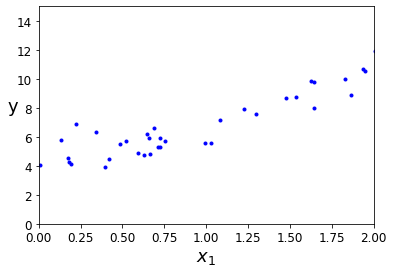

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.00742783],
       [2.92837142]])

We would have hoped for θ = 4 and θ = 3 but the outcome is really close.

#### Now we can make predictions using ˆθ :

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.00742783],
       [9.86417067]])

#### Let’s plot this model’s predictions

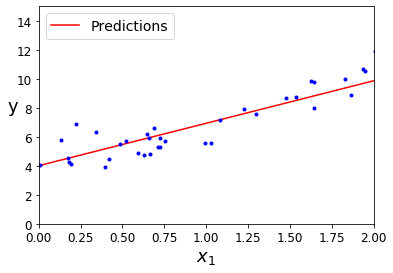

In [7]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.00742783]), array([[2.92837142]]))

In [9]:
lin_reg.predict(X_new)

array([[4.00742783],
       [9.86417067]])

The **LinearRegression** class is based on the **scipy.linalg.lstsq()** function (the name stands for “least squares”), which you could call directly:

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.00742783],
       [2.92837142]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the pseudoinverse of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use **np.linalg.pinv()** to compute the pseudoinverse directly

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.00742783],
       [2.92837142]])

## Gradient Descent

- **Gradient Descent** is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to **tweak parameters iteratively in order to minimize a cost function.**
- It measures the local gradient of the error function with regard to the parameter vector θ, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum!
- Concretely, you start by filling θ with random values (this is called random initialization). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.
- **An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter.** 
    - **If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time.**
    - On the other hand, **if the learning rate is too high**, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.
   
### WARNING
#### When using Gradient Descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.

## Linear Regression Using Batch Gradient Descent
- To implement Gradient Descent, you need to compute the gradient of the cost function with regard to each model parameter θ . In other words, you need to calculate how much the cost function will change if you change θ just a little bit. 
- This is called a **partial derivative.**

### WARNING
- Notice that this formula involves calculations over the full training set X, at each Gradient Descent step! 
- This is why the algorithm is called **Batch Gradient Descent**: **it uses the whole batch of training data at every step** (actually, Full Gradient Descent would probably be a better name). 
- As a result it is terribly slow on very large training sets (but we will see much faster Gradient Descent algorithms shortly). 
- However, Gradient Descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

In [12]:
eta = 0.1 # Learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.00742783],
       [2.92837142]])

In [14]:
X_new_b.dot(theta)

array([[4.00742783],
       [9.86417067]])

In [15]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("$\eta = {}$".format(eta), fontsize=16)

C:\Users\batuh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


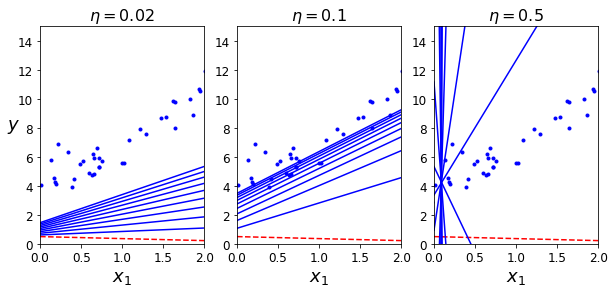

In [16]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
# plt.subplot takes three arguments, the number of rows (nrows), the number of columns (ncols) and the plot number. 

plt.show()

- **On the left, the learning rate is too low**: the algorithm will eventually reach the solution, but it will take a long time. 
- **In the middle, the learning rate looks pretty good**: in just a few iterations, it has already converged to the solution.
- **On the right, the learning rate is too high**: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

## Stochastic Gradient Descent
- The main problem with **Batch Gradient Descent** is the fact that it **uses the whole training set to compute the gradients at every step**, which makes it very slow when the training set is large. 
- At the opposite extreme, **Stochastic(random) Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance.** 
- Obviously, working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration. 
- It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration.
- **On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much less regular than Batch Gradient Descent**: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. 
    - Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. 
    - **So once the algorithm stops, the final parameter values are good, but not optimal.**
- **When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.**
- Therefore, randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. 
    - One solution to this dilemma is to **gradually reduce the learning rate.**
    - The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum.
- The function that determines the learning rate at each iteration is called the **learning schedule**.
    - If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. 
    - If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.
    
#### This code implements Stochastic Gradient Descent using a simple learning schedule:

In [17]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

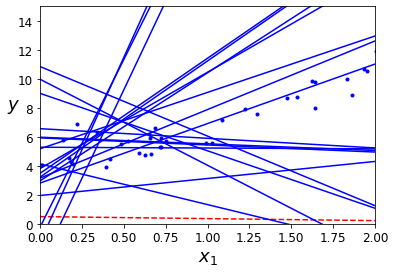

In [18]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # Random initialization
#randn generates an array of shape (d0, d1, ..., dn), filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1.

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)       
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)              

plt.plot(X, y, "b.")                              
plt.xlabel("$x_1$", fontsize=18)                  
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                                                             
plt.show() 

- By convention we iterate by rounds of m iterations; each round is called an epoch. 
- While the Batch Gradient Descent code iterated 1,000 times through the whole training set, this code goes through the training set only 50 times and reaches a pretty good solution:

In [19]:
theta

array([[4.04913598],
       [2.93329854]])

### WARNING
- When using Stochastic Gradient Descent, the training instances must be independent and identically distributed (IID) to ensure that the parameters get pulled toward the global optimum, on average. 
- A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not shuffle the instances—for example, if the instances are sorted by label then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.

- **To perform Linear Regression using Stochastic GD with Scikit-Learn**, you can use the **SGDRegressor** class, which defaults to optimizing the squared error cost function. 
- The following code runs for maximum 1,000 epochs or until the loss drops by less than 0.001 during one epoch (max_iter=1000, tol=1e-3).
- It starts with a learning rate of 0.1 (eta0=0.1), using the default learning schedule (different from the preceding one). - Lastly, it does not use any regularization (penalty=None; more details on this shortly):

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.02680413]), array([3.02763918]))

#### Once again, you find a solution quite close to the one returned by the Normal Equation

## Mini-batch Gradient Descent
- It is simple to understand once you know Batch and Stochastic Gradient Descent: at each step, instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), **Mini-batch GD computes the gradients on small random sets of instances called mini-batches.**
- The main advantage of Mini-batch GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

In [22]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t+t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t+=1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[3.95899914],
       [2.91631255]])

In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

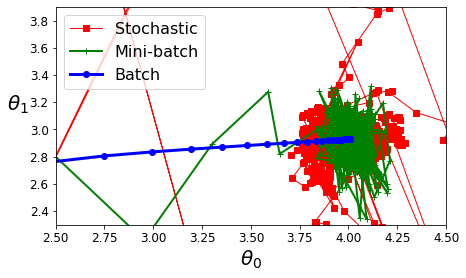

In [25]:
plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic") #[ first_row:last_row , column_index]
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

- The algorithm’s progress in parameter space is less erratic than with Stochastic GD, especially with fairly large mini-batches. 
    - As a result, Mini-batch GD will end up walking around a bit closer to the minimum than Stochastic GD but it may be harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike Linear Regression).
- The line plot above shows the paths taken by the three Gradient Descent algorithms in parameter space during training.
    - They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. 
    - However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

## Polynomial regression
- What if your data is more complex than a straight line? Surprisingly, you can use a linear model to fit nonlinear data. 
- A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. 
- **This technique is called Polynomial Regression.**
- Let’s look at an example. First, let’s generate some nonlinear data, based on a simple quadratic equation (plus some noise)

In [26]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [27]:
m = 100
X = 6 * rnd.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + rnd.randn(m, 1)

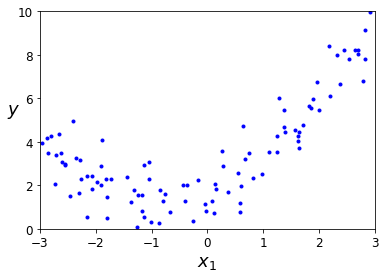

In [28]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

#### Generated nonlinear and noisy dataset

- Clearly, a straight line will never fit this data properly. So let’s use Scikit- Learn’s **PolynomialFeatures** class to transform our training data, adding the square (second-degree polynomial) of each feature in the training set as a new feature (in this case there is just one feature):

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [30]:
X_poly[0]

array([-0.75275929,  0.56664654])

#### X_poly now contains the original feature of X plus the square of this feature.
#### Now you can fit a LinearRegression model to this extended training data

In [31]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

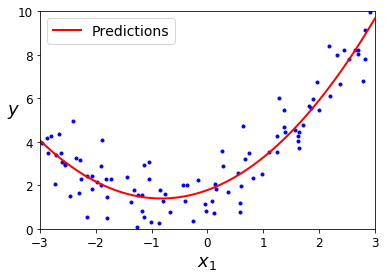

In [32]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

#### Not bad: the model estimates ˆy = 0.56x1 2 + 0.93x1 + 1.78 when in fact the original function was y = 0.5x1 2 + 1.0x1 + 2.0 + Gaussian noise.

## Learning Curves
- If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression.
- For example, apply a 300-degree polynomial model to the preceding training data, and compare the result with a pure linear model and a quadratic model (second-degree polynomial). 
    - Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

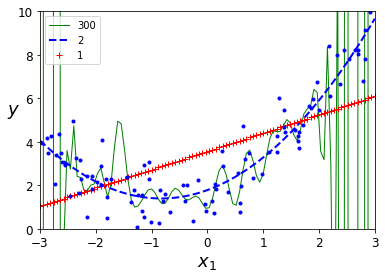

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)
    
plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

- This high-degree Polynomial Regression model is severely overfitting the training data, while the linear model is underfitting it. 
- The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model.
#### But in general you won’t know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?
- We can use cross-validation to get an estimate of a model’s generalization performance. 
    - If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. 
    - If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.
- Another way to tell is to look at the learning curves: these are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). 
    - To generate the plots, train the model several times on different sized subsets of the training set.
    - The following code defines a function that, given some training data, plots the learning curves of a model:

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training Set Size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

#### Let’s look at the learning curves of the plain Linear Regression model (a straight line);

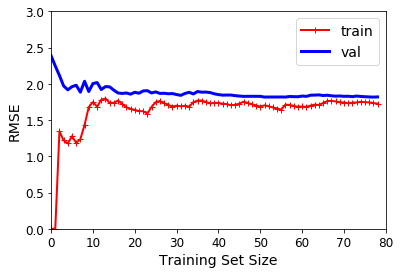

In [35]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

- These learning curves are typical of a model that’s underfitting. Both curves have reached a plateau; they are close and fairly high.
### TIP
- If your model is underfitting the training data, adding more training examples will not help.
- You need to use a more complex model or come up with better features.
#### Now let’s look at the learning curves of a 10th-degree polynomial model on the same data

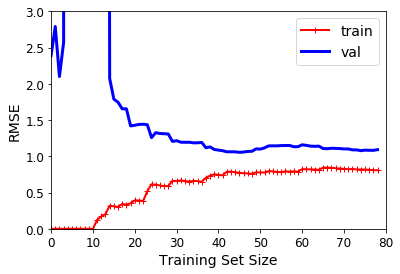

In [36]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show() 

#### These learning curves look a bit like the previous ones, but there are two very important differences:
- The error on the training data is much lower than with the Linear Regression model.
- There is a gap between the curves. 
    - This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. 
    - If you used a much larger training set, however, the two curves would continue to get closer.

### TIP
#### One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

# Regularized Linear Models
- A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. 
- A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.
- For a linear model, regularization is typically achieved by constraining the weights of the model. 
- We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

## Ridge Regression
- Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to αΣn i=1 θi2 is added to the cost function. 
- This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. 
- **Note that the regularization term should only be added to the cost function during training**. 
- Once the model is trained, you want to use the unregularized performance measure to evaluate the model’s performance.
- The hyperparameter α controls how much you want to regularize the model. 
    - **If α = 0, then Ridge Regression is just Linear Regression**. 
    - If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.
### WARNING
- **It is important to scale the data (e.g., using a StandardScaler) before performing Ridge Regression**, as it is sensitive to the scale of the input features. 
- This is true of most regularized models.

In [37]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

#### Here is how to perform Ridge Regression with Scikit-Learn using a closed form solution (a variant that uses a matrix factorization technique by André-Louis Cholesky)

In [38]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
# ‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [39]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

#### ‘sag’ uses a Stochastic Average Gradient descent, and ‘saga’ uses its improved, unbiased version named SAGA. 
- Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. 
- Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. 
    - You can preprocess the data with a scaler from sklearn.preprocessing.

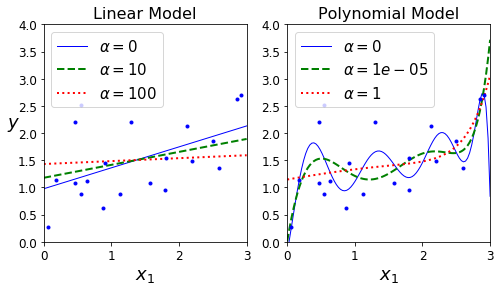

In [40]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])
    
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.title("Linear Model", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.title("Polynomial Model", fontsize=16)

plt.show()

- Line plots above shows several Ridge models trained on some linear data using different α values. 
    - On the left, plain Ridge models are used, leading to linear predictions. 
    - On the right, the data is first expanded using PolynomialFeatures(degree=10), then it is scaled using a StandardScaler, and finally the Ridge models are applied to the resulting features: this is Polynomial Regression with Ridge regularization. 
- Note how increasing α leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model’s variance but increasing its bias.

#### Here is how to perform Ridge Regression using Stochastic Gradient Descent:

In [41]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

- The penalty hyperparameter sets the type of regularization term to use.
- Specifying **"l2"** indicates that you want SGD to add a regularization term to the cost function equal to half the square of the ℓ2 norm of the weight vector: **This is simply Ridge Regression.**

## Lasso Regression
- Least Absolute Shrinkage and Selection Operator Regression (usually simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm.

C:\Users\batuh\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8028677038274434, tolerance: 0.0009294783355207351
  positive)


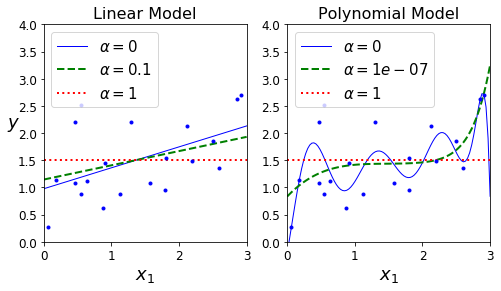

In [42]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.title("Linear Model", fontsize=16)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)
plt.title("Polynomial Model", fontsize=16)

plt.show()

- An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). 
- For example, the dashed line in the righthand plot above (with α = 10 ) looks quadratic, almost linear: all the weights for the high-degree polynomial features are equal to zero. 
- **In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).**

#### Here is a small Scikit-Learn example using the Lasso class:

In [43]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

#### Note that you could instead use SGDRegressor(penalty="l1").

## Elastic Net
- Elastic Net is a middle ground between Ridge Regression and Lasso Regression. 
- The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r.
- **When r = 0, Elastic Net is equivalent to Ridge Regression**, and **when r = 1, it is equivalent to Lasso Regression.**
- So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net?
- **It is almost always preferable to have at least a little bit of regularization**, so generally you should avoid plain Linear Regression. 
    - Ridge is a good default, but if you suspect that only a few features are useful, you should prefer **Lasso or Elastic Net** because they **tend to reduce the useless features’ weights down to zero**, as we have discussed. 
    - In general, **Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated**.

#### Here is a short example that uses Scikit-Learn’s ElasticNet (l1_ratio corresponds to the mix ratio r):

In [44]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping
- A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. 
- **This is called early stopping.**

In [45]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)# Generate a 2-D array with m(100) rows, each row containing 1 random number.
#  from the “standard normal” distribution
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

#### Early stopping example:

In [46]:
from copy import deepcopy

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)
"""Note that with warm_start=True, when the fit() method is called it continues training where it left off, 
instead of restarting from scratch."""
# learning_rate="constant" : eta=eta0
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)
        
# deepcopy :  any changes made to a copy of object do not reflect in the original object.

#### Create the graph:

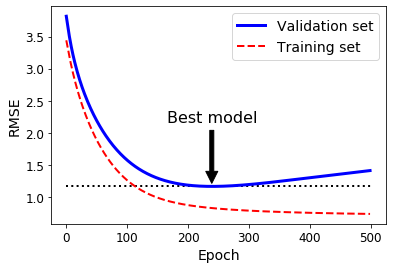

In [47]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)
n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
    
best_epoch = np.argmin(val_errors) #np.argmin: Returns the indices of the minimum values along an axis.
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate("Best model", 
            xy=(best_epoch, best_val_rmse), 
            xytext=(best_epoch, best_val_rmse + 1), 
            ha="center", 
            arrowprops=dict(facecolor="black", shrink=0.05), 
            fontsize=16, 
            )

plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2) #plots black dotted line which is the best_val_rmse score
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set") #plots blue line
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")#plots dashed red line
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

plt.show()

In [48]:
best_epoch,  best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

- The Line plot above shows a complex model (in this case, a high-degree Polynomial Regression model) being trained with Batch Gradient Descent. 
    - As the epochs go by the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. 
    - **After a while though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data.** 
    - With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”
    
### TIP
- With Stochastic and Mini-batch Gradient Descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. 
- **One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.**

## Logistic Regression
- Some regression algorithms can be used for classification (and vice versa). 
- Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). 
    - **If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”)**, 
    - **and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”)**. 
- This makes it a **binary classifier.**

### Estimating Probabilities
- So how does Logistic Regression work? 
    - Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.
    - The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number between 0 and 1.
    - Notice that σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a Logistic Regression model predicts 1 if x θ is positive and 0 if it is negative.
    
### NOTE
- The score t is often called the **logit**. 
- The name comes from the fact that the logit function, defined as logit(p) = log(p / (1 – p)), is the inverse of the logistic function. 
- Indeed, if you compute the logit of the estimated probability p, you will find that the result is t. 
- The logit is also called the log-odds, since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class.

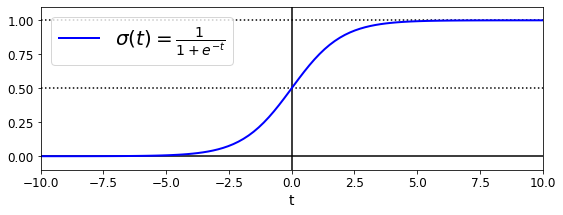

In [49]:
t = np.linspace(-10, 10, 100) # created a linear space with 100 values betweenn -10 and 10.
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

### Training and Cost Function
- The objective of training is to set the parameter vector θ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0).
    - log(t) grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance,
    - and it will also be very large if the model estimates a probability close to 1 for a negative instance.
    - On the other hand, log(t) is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.
- The cost function over the whole training set is the average cost over all training instances.
- The bad news is that there is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal Equation). 
- **The good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough).**

### Decision Boundaries
- Let’s use the iris dataset to illustrate Logistic Regression. 
- This is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris setosa, Iris versicolor, and Iris virginica.
#### Let’s try to build a classifier to detect the Iris virginica type based only on the petal width feature. First let’s load the data:

In [50]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [51]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [52]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [53]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

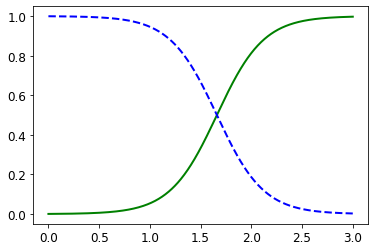

In [54]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

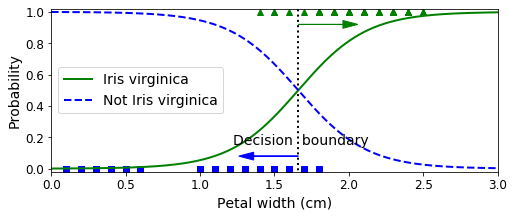

In [55]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

In [56]:
decision_boundary

array([1.66066066])

In [57]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

### Softmax Regression
- The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers). 
- **This is called Softmax Regression, or Multinomial Logistic Regression.**
- The idea is simple: when given an instance x, the Softmax Regression model first computes a score s (x) for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores.
#### sk (x) = x⊺θ(k)
- Once you have computed the score of every class for the instance x, you can estimate the probability ˆpk that the instance belongs to class k by running the scores through the softmax function. 
- The softmax function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called logits or log-odds (although they are actually unnormalized log-odds).
- Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).
#### TIP
- **The Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput)**, so it should be used only with mutually exclusive classes, such as different types of plants. 
- You cannot use it to recognize multiple people in one picture.

- Now that you know how the model estimates probabilities and makes predictions, let’s take a look at training. 
- The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes).
- Minimizing the cost function, called the cross entropy, should lead to this objective because it penalizes the model when it estimates a low probability for a target class.
    - Cross entropy is frequently used to measure how well a set of estimated class probabilities matches the target classes.

#### Let’s use Softmax Regression to classify the iris flowers into all three classes.
- Scikit-Learn’s LogisticRegression **uses one-versus-the-rest by default when you train it on more than two classes**, but you can set the **multi_class hyperparameter to "multinomial" to switch it to Softmax Regression.**
    - You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver.
    - It also applies ℓ2 regularization by default, which you can control using the hyperparameter C:

In [58]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [59]:
softmax_reg.predict([[5, 2]])

array([2])

In [60]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

- So the next time you find an iris with petals that are 5 cm long and 2 cm wide, you can ask your model to tell you what type of iris it is, and it will answer Iris virginica (class 2) with 94.2% probability (or Iris versicolor with 5.8% probability): 
#### As we can see above.